The data for this assignment consists of monthly observations on the prices of the largest 136 stocks in Australia from Dec 1999 to Jun 2014. You will need to place the data file in the same folder (location) as this notebook. 

Consider a portfolio constructed by holding <u>one share in each stock</u> in the dataset that has a price recorded at every time period. We'll use $P_{it}$ to denote the price of the $i^{\text th}$ stock at time $t$ and $P_t$ to denote the price of the portfolio at time $t$.

In [1]:
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Make sure your data is in the same folder as this notebook
assert os.path.isfile('./AusFirms.csv'), 'Data file Missing!'

In [3]:
file = os.path.basename('./AusFirms.csv')
ausFirms = pd.read_csv(file, parse_dates = ['date'], date_format='%m/%d/%y')
# IF YOU HAVE AN OLD VERSION OF PANDAS, THEN THE ABOVE LINE MIGHT RESULT IN AN ERROR. IN THAT CASE, COMMENT THAT LINE AND UNCOMMENT THE TWO LINES BELOW.
# ausFirms = pd.read_csv(file)
# ausFirms['date'] = pd.to_datetime(ausFirms['date'], format = '%m/%d/%y')
ausFirms.drop(columns=['rf', 'mkt'], inplace=True)
ausFirms.set_index('date', inplace=True)

### RUN THE 3 CELLS ABOVE BUT PLEASE DON'T MODIFY ANYTHING ABOVE THIS LINE

#### 1. Delete any stock that has missing observations.

In [4]:
# Enter your code here
ausFirms.dropna(axis=1, inplace=True)
# ausFirms.head()

#### 2. How many stocks are remaining?

In [5]:
# Enter your code here
print(ausFirms.shape[1])

81


#### 3. Create a new series called $P$ that records the portfolio value for each date. Since you have one share of each stock in the portfolio, you just need to add all the prices.

In [6]:
# Enter your code here
P= ausFirms.sum(axis=1)

#### 4. Let's say the starting date is 1 and the ending date is $T$. For the portfolio, calculate the simple return: $\frac{P_T}{P_1}-1$; and the log return: $\log\left(\frac{P_T}{P_1 }\right)$.

In [7]:
# Your code here (enter your code inside the { . } for each return)
print(f'Simple return = {(P.iloc[-1]/P.iloc[0])-1 }; Log return = {np.log( P.iloc[-1]/P.iloc[0])}')

Simple return = 1.0320484213714782; Log return = 0.709044358847417


#### 5. Calculate the portfolio weights: $\text{w}_{it} = \frac{P_{it}}{P_t}$. 

If you use the *divide* method from Pandas, this is just one line and you will end up with a dataframe the same size as ausFirms.

In [8]:
# Your code here (one line)
port_weights= ausFirms.divide(P, axis=0)

#### 6. Calculate the simple returns for each stock: $R_{it} = \frac{P_{it}}{P_{i,t-1}}-1$ and the log returns for each stock: $r_{it} = \log\frac{P_{it}}{P_{i,t-1}}$.

You only need one line for each return. To get $P_{i,t-1}$, you can use the *shift* method in Pandas.

In [9]:
# Your code here
sRet= ausFirms.divide(ausFirms.shift(periods=1,axis=0))-1
lRet= np.log(ausFirms.divide(ausFirms.shift(periods=1,axis=0)))

#### 7. Now calculate the portfolio returns as follows:
- For simple returns: $R_{Pt} = w_{1,t-1}R_{1t} + w_{2,t-1}R_{2t} + \cdots + w_{n,t-1}R_{nt}$
- For log returns: $r_{Pt} = \log (w_{1,t-1}e^{r_{1t}} + w_{2,t-1}e^{r_{2t}} + \cdots + w_{n,t-1}e^{r_{nt}})$

Note that the time index on the weights is one period behind the returns.

In [10]:
# Your code here (one line for each type of return). After calculating the returns, remove the first row because it is not valid.
sRetPort= (port_weights.shift(periods=1)* sRet).sum(axis=1)
lRetPort= np.log((port_weights.shift(periods=1) * np.exp(lRet)).sum(axis=1))
lRetPort=lRetPort[1:]
sRetPort=sRetPort[1:]

/Users/mugunth/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### 8. Plot the portfolio return series - simple and log

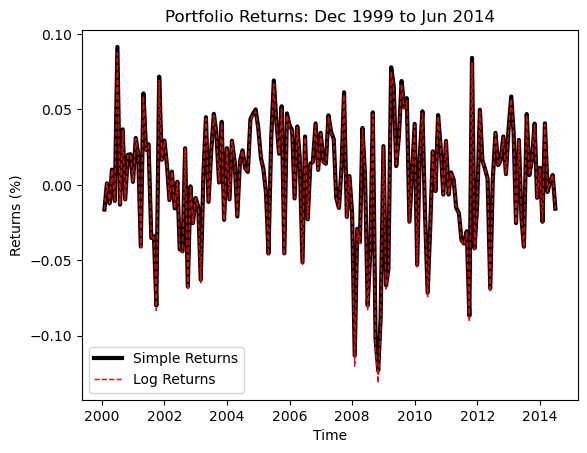

In [11]:
# Both plots on the same figure. Use two different linestyles and include a legend.
plt.plot(sRetPort.index, sRetPort, label='Simple Returns', linewidth=3,color='black')
plt.plot(lRetPort.index, lRetPort, label='Log Returns', linewidth=1, linestyle='dashed', color='red')

plt.title('Portfolio Returns: Dec 1999 to Jun 2014')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()

plt.show()

#### 9. For each stock in the portfolio, calculate the excess kurtosis of the log returns. Then, create a histogram of the kurtosis values.

You can use the *kurtosis* function in scipy for this. The result from this function should be an array of kurtosis values. Then, create a histogram from this array. You can do this entire step in one line if you want to.

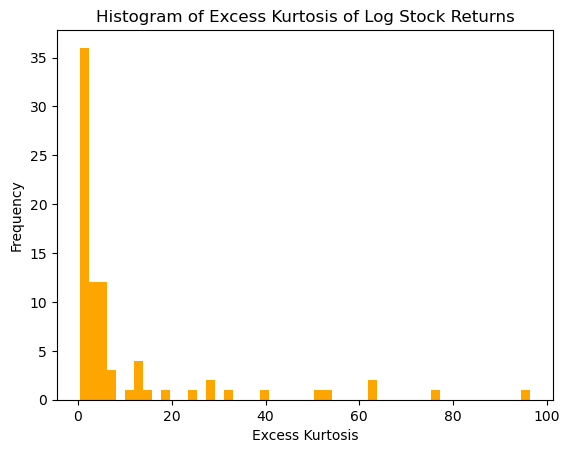

In [12]:
# Your code here. 

exKurtstock = stats.kurtosis(lRet.dropna())
plt.hist(exKurtstock, bins=50, color='orange' )
plt.xlabel('Excess Kurtosis')
plt.ylabel('Frequency')
plt.title("Histogram of Excess Kurtosis of Log Stock Returns")
plt.show()


What do you conclude about the distributions of stock returns from the histogram you've just created? Enter your answer in the cell below.

The histogram of excess kurtosis of stock returns shows an evident tail to the right making it a heavily right skewed distribution. This property is called leptokurtosis which evidences more extreme returns when compared to normal distribution as seen on the histogram. The presence of higher kurtosis suggests higher risk to the investors as it is associated with extreme outcomes.

#### 9a. Now calculate the excess kurtosis of the portfolio log return.

You should see a big difference between the kurtosis of a typical stock return and the kurtosis of the portfolio. This is one reason why portfolio returns can often be approximated using a normal distribution but individual stock returns cannot.

In [13]:
# lRetPort.kurtosis()
stats.kurtosis(lRetPort)

0.8001925120930893

#### 10. Calculate autocorrelation function over 6 lags for the portfolio log return.

You can use the *acf* function in statsmodels to make this easy.

In [14]:
# Your code here.
acf(lRetPort, nlags=6)

array([1.        , 0.14872526, 0.09726622, 0.17614756, 0.09995621,
       0.00225414, 0.00175506])

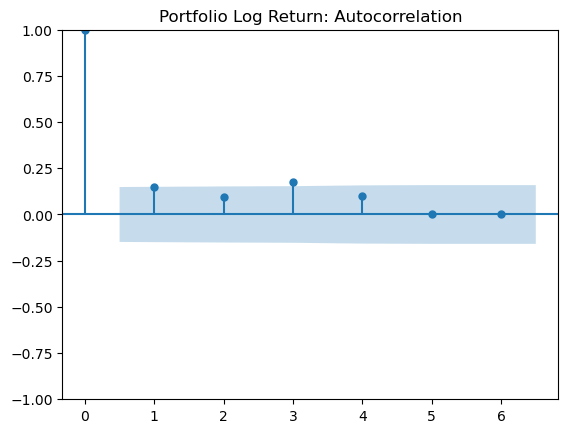

In [15]:
plot_acf(lRetPort, lags=6, title="Portfolio Log Return: Autocorrelation");

In class, we saw an example where the DM/USD exchange rate had very low autocorrelation values and we took that as evidence of market efficiency. What do you observe here? Enter your answer in the cell below.

The autocorrelations for all 6 lags are clustered around 0 suggesting low autocorrelation. At a confidence level of 5%, we can see that lags 1 and 3 are slightly above the significance zone indicating they are statistically significant at this level. This suggests that there is some degree of predictability in these lags and this could potentially challenge the Efficient Market Hypothesis. 